## Tarea 12
## Cluster analysis

load libraries

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib import colormaps

load data

In [3]:
# Read in the data from the csv file
CO2Data = pd.read_csv("../data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

### define functions
Clean dataframe and scaling function

In [4]:
def preprocess_data(df, variables):
    """
    Standardize selected variables and return clean DataFrame.
    """
    df_clean = df.dropna(subset=variables)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[variables])
    return df_clean, X_scaled

cluster function

In [5]:
def perform_hierarchical_clustering(X_scaled, method='ward', n_clusters=3):
    """
    Perform hierarchical clustering and return cluster labels.
    """
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels

dendogram plot funtion

In [6]:
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=3):
    """
    Plot a dendrogram from the hierarchical clustering with sample labels.
    Annotate the plot with the number of clusters.
    """
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    plt.figure(figsize=(10, 5))
    dendrogram(
        linkage_matrix,
        labels=labels,
        above_threshold_color='gray'  # Default color for links above the threshold
    )
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

Execture functions in data

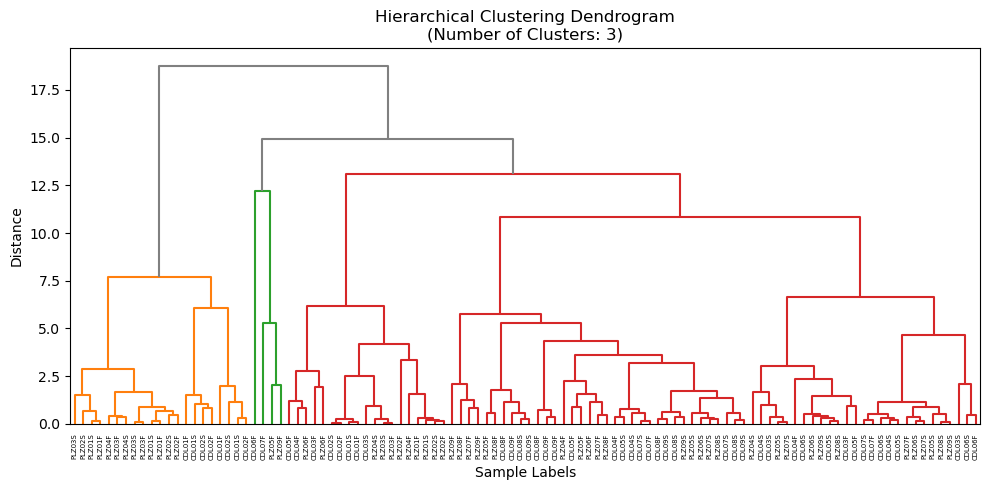

In [7]:
# Main workflow

# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']

# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(CO2Data, selected_vars)

# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=3)
 
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

## EXERCISES
### Change cluster numbers to 4

In [14]:
def perform_hierarchical_clustering(X_scaled, method='ward', n_clusters=4):
    """
    Perform hierarchical clustering and return cluster labels.
    """
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels

In [ ]:
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    """
    Plot a dendrogram from the hierarchical clustering with sample labels.
    Annotate the plot with the number of clusters.
    """
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    # Calculate cut threshold (color_threshold) to chow n clusters defined based in distance
    
    distances = linkage_matrix[:, 2]
    threshold = sorted(distances, reverse=True)[n_clusters - 1]

    # plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(
        linkage_matrix,
        labels=labels,
        color_threshold=threshold,  # Color based on threshold
    )
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Cut at {threshold:.2f}')
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.legend()
    plt.tight_layout()
    plt.show()

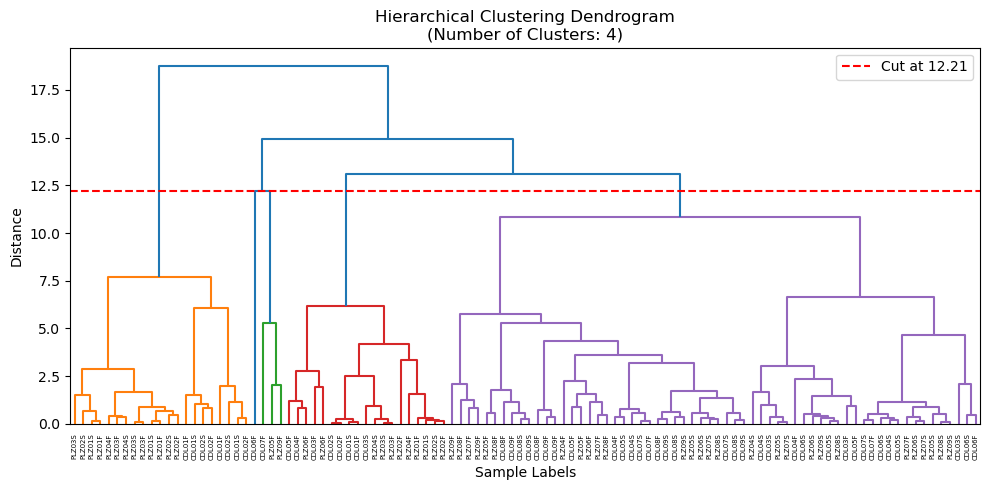

In [19]:
# Main workflow

# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']

# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(CO2Data, selected_vars)

# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=4)
 
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values, n_clusters=4)

### Try a different cluster method (single, complete or average)

In [20]:
from scipy.cluster.hierarchy import average, fcluster
from scipy.spatial.distance import pdist

In [21]:
def perform_hierarchical_clustering(X_scaled, method='average', n_clusters=4):
    """
    Perform hierarchical clustering and return the linkage matrix and cluster labels.

    Parameters:
        X_scaled (np.array): Scaled data.
        method (str): Linkage method ('ward', 'average', 'complete', etc.).
        n_clusters (int): Desired number of clusters.

    Returns:
        linkage_matrix (ndarray): Hierarchical clustering encoded as a linkage matrix.
        cluster_labels (ndarray): Cluster assignment for each sample.
    """
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels


In [22]:
def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    """
    Plot a dendrogram and annotate the number of clusters with a horizontal cut line.

    Parameters:
        linkage_matrix (ndarray): Linkage matrix from hierarchical clustering.
        labels (list or array): Sample labels for x-axis.
        n_clusters (int): Number of clusters to visualize.
    """
    # Get the threshold distance to create 'n_clusters'
    distances = linkage_matrix[:, 2]
    threshold = sorted(distances, reverse=True)[n_clusters - 1]

    plt.figure(figsize=(10, 5))
    dendrogram(
        linkage_matrix,
        labels=labels,
        color_threshold=threshold  # Color branches below threshold
    )
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Cut at {threshold:.2f}')
    plt.title(f'Hierarchical Clustering Dendrogram\n(Method: Average, Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.legend()
    plt.tight_layout()
    plt.show()

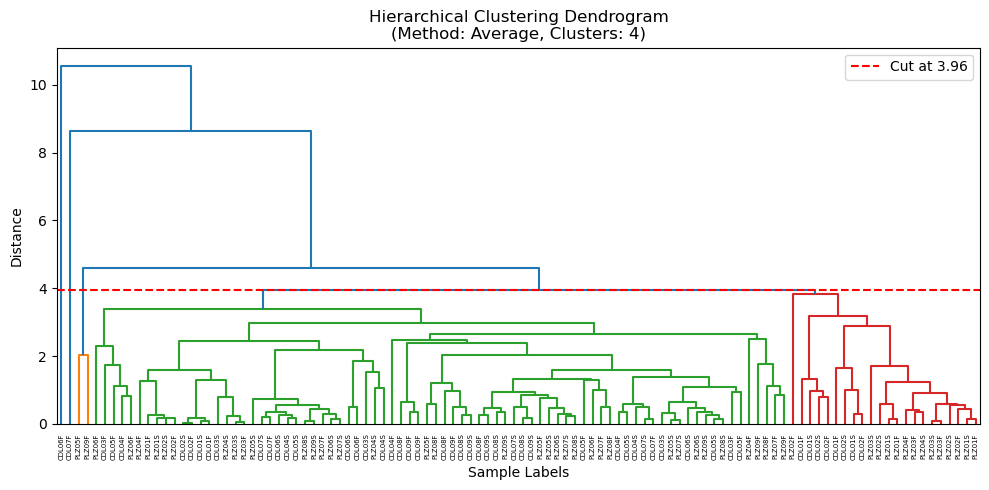

In [23]:
# Select features for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 
                 'do_mg_l', 'chlorophy_microg_l', 'turbidity_fnu']

# Preprocess the data: drop missing values and standardize
df_clean, X_scaled = preprocess_data(CO2Data, selected_vars)

# Perform hierarchical clustering using the 'average' method and 4 clusters
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, method='average', n_clusters=4)

# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram with 4 clusters
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values, n_clusters=4)